<a href="https://colab.research.google.com/github/GideonsMarch/AI_Repo/blob/master/VGG16_OnCatsAndDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn, optim
from torchvision import datasets, models, transforms
import os
import zipfile

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [4]:
model = models.vgg16(pretrained=True)

model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
for param in model.parameters():
    param.requires_grad = False

In [0]:
model.classifier[-1] = nn.Sequential(nn.Linear(4096, 2),
                                    nn.LogSoftmax(dim=1))

model

In [0]:
model.to(device)

In [0]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

**Training the network**



In [0]:
local_zip_train = 'training_set.zip'

zip_ref_train = zipfile.ZipFile(local_zip_train, 'r')
zip_ref_train.extractall()
zip_ref_train.close()

In [0]:
data_dir = r"training_set"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_train = datasets.ImageFolder(data_dir, transform = transform)
train_loader = torch.utils.data.DataLoader(data_train, batch_size = 64, shuffle=True)

In [0]:
epochs = 1
cum_loss = 0.0
batch_loss = 0.0

model.train()

for epoch in range(epochs):
    for batch, (images, labels) in enumerate(train_loader, 1):

        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        log_preds = model(images)
        loss = criterion(log_preds, labels)
        
        loss.backward()
        optimizer.step()
        
        batch_loss += loss.item()
        
        print(f"Epoch: {epoch}/{epochs}, batch nu: {batch}/{len(train_loader)}, batch_loss: {loss.item()}")
        
    print(f"Training Loss: {batch_loss / len(train_loader)}")

**Testing the model**

In [0]:

local_zip_test  = 'test_set.zip'

zip_ref_test = zipfile.ZipFile(local_zip_test, 'r')
zip_ref_test.extractall()
zip_ref_test.close()

In [0]:
test_dir = r"test_set"

transform = transforms.Compose([
                                transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

testFolder = datasets.ImageFolder(test_dir, transform = transform)
test_loader = torch.utils.data.DataLoader(testFolder, shuffle=True, batch_size=64)


In [22]:
model.eval()

test_loss = 0
accuracy = 0.0

with torch.no_grad():
  for batch, (images, labels) in enumerate(test_loader, 1):
    images, labels = images.to(device), labels.to(device)
    test_predictions = model(images)

    pred_loss = criterion(test_predictions, labels)
    test_loss += pred_loss.item()

    test_predictions = torch.exp(test_predictions)

    top_ps, top_class = test_predictions.topk(1, dim=1)
    equals = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))

  print(f"Accuracy: {accuracy / len(test_loader)}")
    

Accuracy: 0.9879682660102844


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

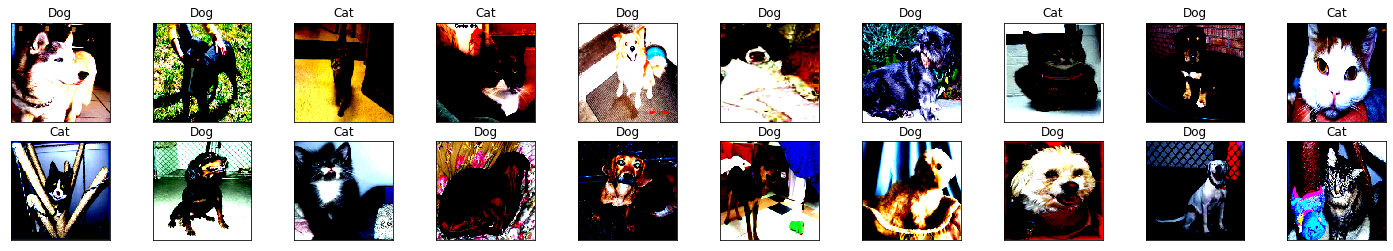

In [36]:
classes = ['Cat', 'Dog']

images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

predictions = model(images)

top_ps, top_class = predictions.topk(1, dim=1)

fig = plt.figure(figsize=(25, 4))

images = images.to('cpu')
images = images.numpy()

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[top_class[idx]])
